In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
movies = pd.read_csv("C:\\Users\\linds\\downloads\\movies.csv")
ratings = pd.read_csv("C:\\Users\\linds\\downloads\\ratings.csv")
tags = pd.read_csv("C:\\Users\\linds\\downloads\\tags.csv")
links = pd.read_csv("C:\\Users\\linds\\downloads\\links.csv")
df = pd.read_csv("C:\\Users\\linds\\downloads\\genome-tags.csv")
gscore = pd.read_csv("C:\\Users\\linds\\downloads\\genome-scores.csv")

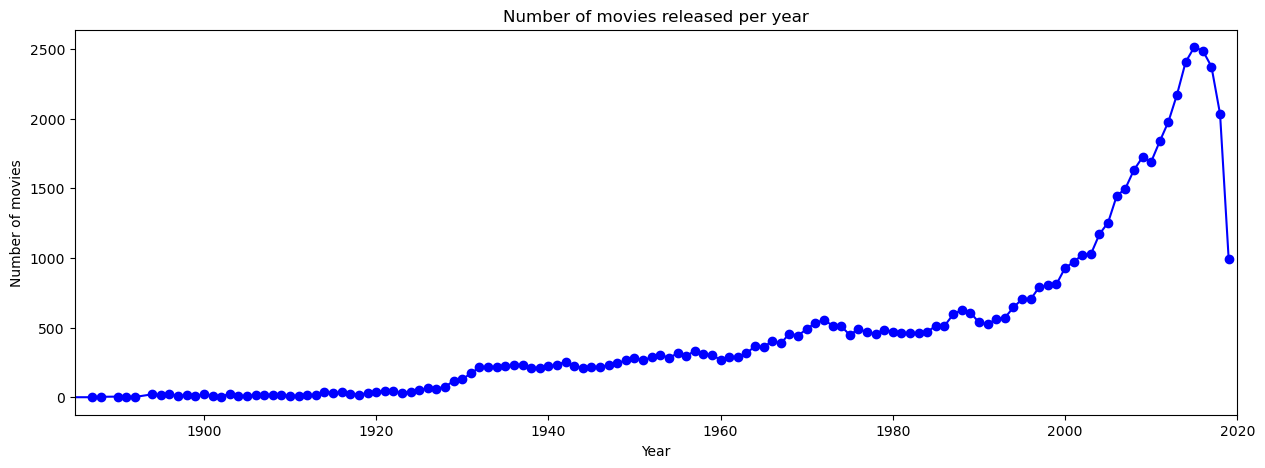

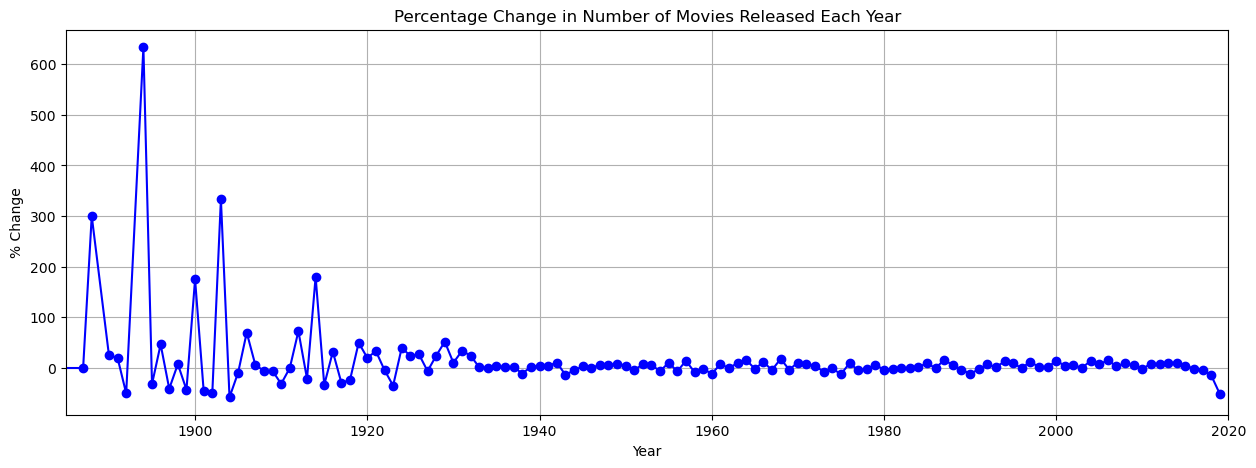

In [24]:
#1

# number of movies
movies['movie_year'] = movies['title'].str.extract('\((\d{4})\)').astype(float)
movie_counts = movies.groupby('movie_year').size()
movies['movie_year'].fillna(0, inplace=True)


plt.plot(movie_counts.index, movie_counts.values, 'bo-')
plt.title('Number of movies released per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.xlim(1885, 2020)
plt.show()

# percentage of time
movie_count = movies['movie_year'].value_counts().sort_index()
movie_pct_change = movie_count.pct_change() * 100
movie_pct_change = movie_pct_change.dropna() 

plt.plot(movie_pct_change.index, movie_pct_change.values, 'bo-')
plt.grid(True)
plt.rcParams["figure.figsize"] = (15, 5)
plt.title('Percentage Change in Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.xlim(1885, 2020)
plt.show()

The initial chart illustrates a positive trajectory, suggesting a rise in the number of movies released in recent years in comparison to earlier ones. Specifically, the quantity of movies released annually has predominantly increased from 1900 to 2015. However, between 2015 and 2020, there are notable fluctuations in the number of movies released, which deviate from the overall upward trend.

As for the second chart, it reveals a significant percentage change in the number of movies released during the earlier years, spanning from 1900 to 1930. However, after 1930, there appears to be a relatively stable pattern with minimal fluctuations in the yearly release of movies.


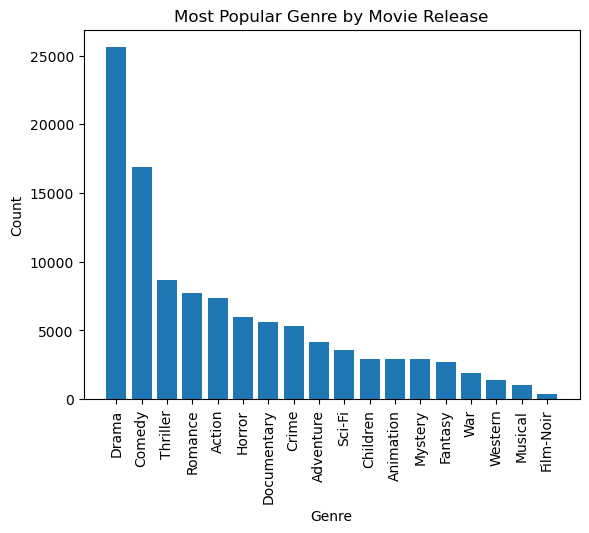

In [8]:
#2

# List of genres
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


#By movie release
movies = movies[~movies['genres'].str.contains('no genres listed')]

genre_counts = {}
for genre in genres:
    genre_counts[genre] = movies['genres'].str.contains(genre).sum()


genre_counts_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Count'])
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

plt.bar(genre_counts_df.index, genre_counts_df['Count'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Most Popular Genre by Movie Release')
plt.show()



Drama is the most popular genre with over 25,000 movie releases followed by Comedy with more than 15,000 releases.

<Figure size 1200x600 with 0 Axes>

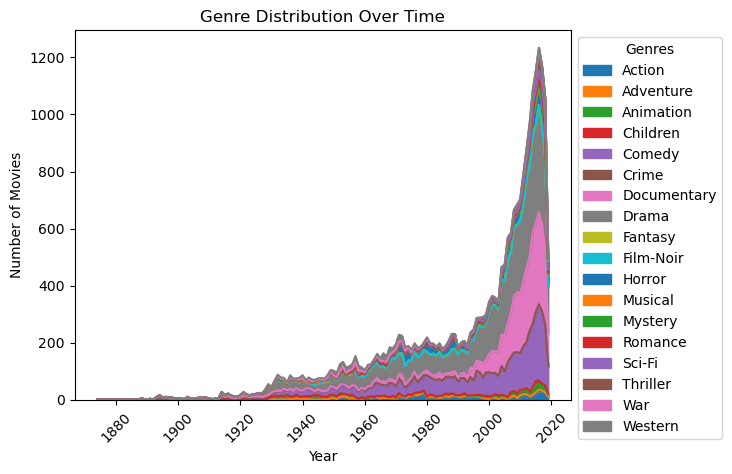

In [4]:
#3
import pandas as pd
import matplotlib.pyplot as plt

genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies = pd.read_csv("C:\\Users\\linds\\downloads\\movies.csv")
movies['movie_year'] = movies['title'].str.extract('\((\d{4})\)').astype(float)

genre_counts = movies.groupby(['movie_year', 'genres'])['movieId'].count().reset_index()
genre_counts_pivot = genre_counts.pivot(index='movie_year', columns='genres', values='movieId').fillna(0)

genre_counts_pivot = genre_counts_pivot[genres]

plt.figure(figsize=(12, 6))
genre_counts_pivot.plot.area(stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Genre Distribution Over Time')
plt.xticks(rotation=45)
plt.legend(title='Genres', bbox_to_anchor=(1, 1))
plt.show()

Based on the stacked area plot, we can observe that the genres with the most significant areas are drama, documentary, and sci-fi. This indicates that a higher number of movies belonging to these genres were released over time.

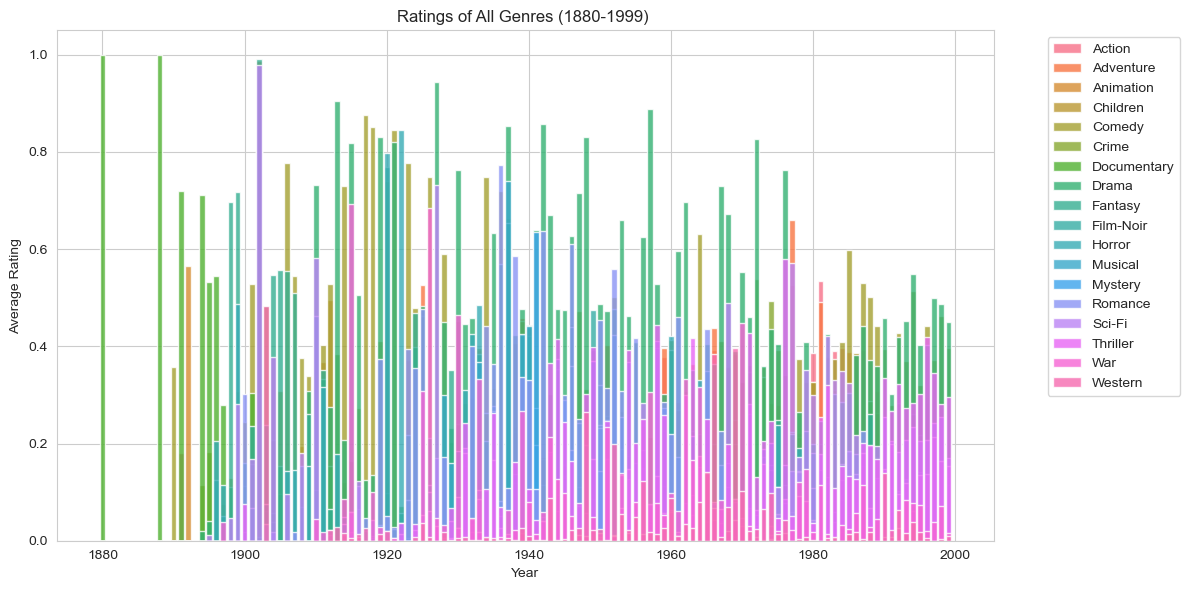

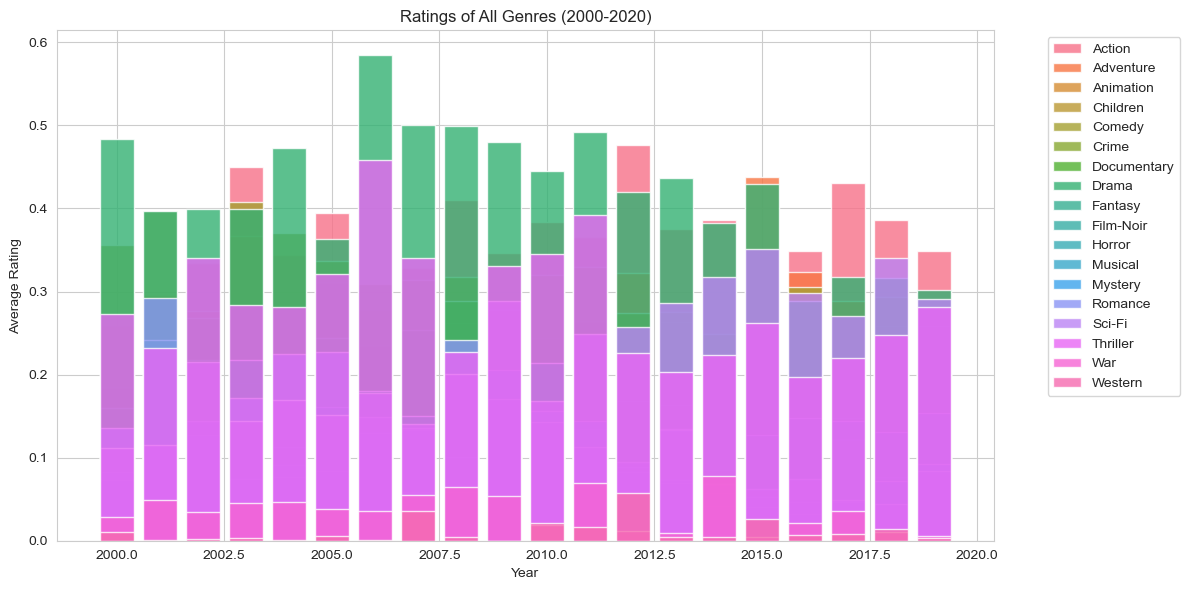

In [26]:
movies['Year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False).astype(float)


movie_ratings = pd.merge(movies, ratings, on='movieId')

movie_ratings_2000_2020 = movie_ratings[movie_ratings['Year'].between(2000, 2020)]
movie_ratings_1880_1999 = movie_ratings[movie_ratings['Year'].between(1880, 1999)]


subset_2000_2020 = movie_ratings_2000_2020[['Year', 'genres', 'rating']]
subset_1880_1999 = movie_ratings_1880_1999[['Year', 'genres', 'rating']]


genre_columns_2000_2020 = subset_2000_2020['genres'].str.get_dummies('|')
subset_2000_2020 = pd.concat([subset_2000_2020[['Year', 'rating']], genre_columns_2000_2020], axis=1)

genre_columns_1880_1999 = subset_1880_1999['genres'].str.get_dummies('|')
subset_1880_1999 = pd.concat([subset_1880_1999[['Year', 'rating']], genre_columns_1880_1999], axis=1)


genre_ratings_2000_2020 = subset_2000_2020.groupby('Year').mean().reset_index()
genre_ratings_1880_1999 = subset_1880_1999.groupby('Year').mean().reset_index()


sns.set_style('whitegrid')

#the ratings of all genres over the years (1880-1999)
plt.figure(figsize=(12, 6))
sns.set_palette("husl", len(genres))  # Set a color palette for the genres
for i, genre in enumerate(genres):
    plt.bar(genre_ratings_1880_1999['Year'], genre_ratings_1880_1999[genre], alpha=0.8, label=genre)
plt.title('Ratings of All Genres (1880-1999) ')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#the ratings of all genres over the years (2000-2020)
plt.figure(figsize=(12, 6))
sns.set_palette("husl", len(genres))  # Set a color palette for the genres
for i, genre in enumerate(genres):
    plt.bar(genre_ratings_2000_2020['Year'], genre_ratings_2000_2020[genre], alpha=0.8, label=genre)
plt.title('Ratings of All Genres (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

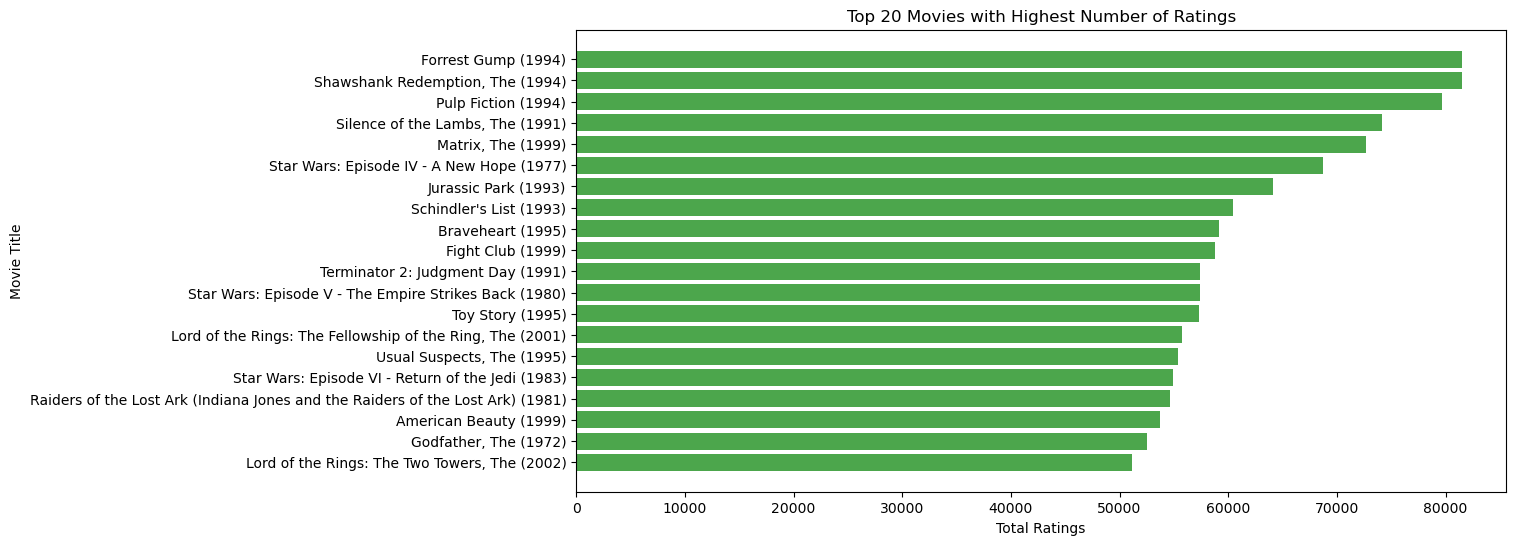

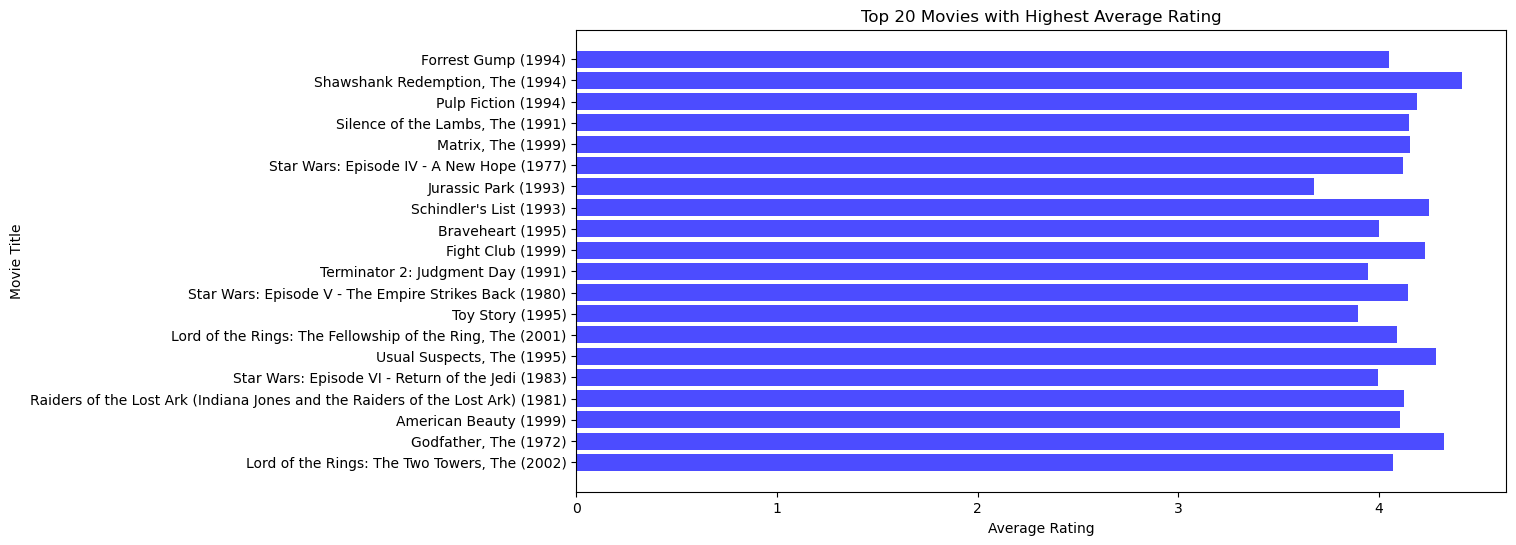

In [20]:
#4

merged_data = pd.merge(movies, ratings, on='movieId')
rating_counts = merged_data.groupby('title')['rating'].count()
average_ratings = merged_data.groupby('title')['rating'].mean()

movies_ratings = pd.DataFrame({'Total Ratings': rating_counts, 'Average Rating': average_ratings})

top_movies = movies_ratings.sort_values(['Total Ratings', 'Average Rating'], ascending=False).head(20)

#Number of Ratings
plt.figure(figsize=(12, 6)) 
plt.barh(top_movies.index, top_movies['Total Ratings'], color='green', alpha=0.7)
plt.xlabel('Total Ratings')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies with Highest Number of Ratings')
plt.gca().invert_yaxis() 
plt.show()

#Average Star Rating
plt.figure(figsize=(12, 6))
plt.barh(top_movies.index, top_movies['Average Rating'], color='blue', alpha=0.7)
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies with Highest Average Rating')
plt.gca().invert_yaxis()  
plt.show()

"Forrest Gump" has amassed an impressive count of nearly 80,000 ratings, making it the movie with the highest number of ratings. However, "The Shawshank Redemption" holds the accolade for having the highest average star rating, with an approximate rating of 4.5 out of 5.

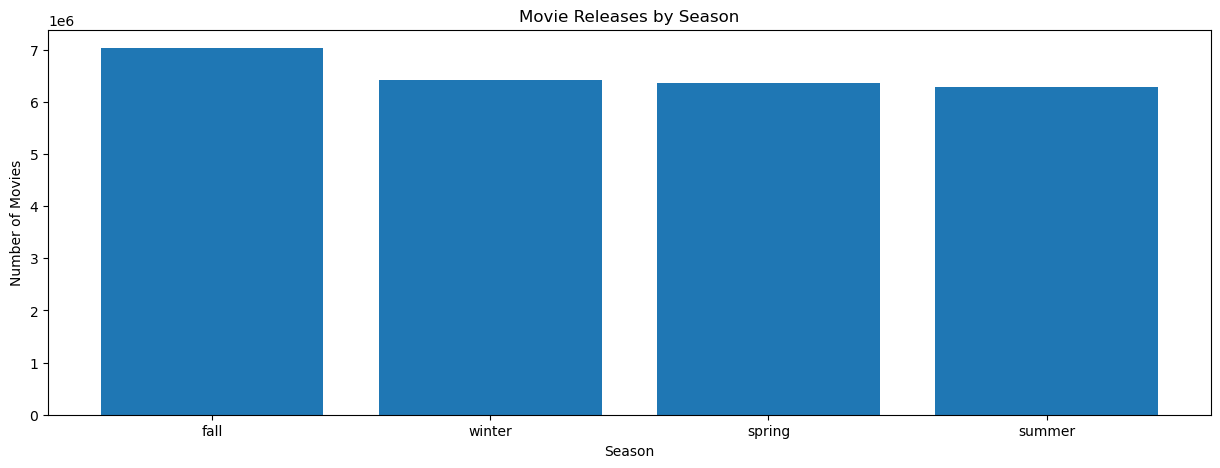

In [26]:
#5

merged_df = pd.concat([ratings_df, tags_df])
merged_df['date'] = pd.to_datetime(merged_df['timestamp'], unit='s')


merged_df['season'] = (merged_df['date'].dt.month - 1) // 3
merged_df['season'] = merged_df['season'].replace([0, 1, 2, 3], ['winter', 'spring', 'summer', 'fall'])

season_counts = merged_df['season'].value_counts()

plt.bar(season_counts.index, season_counts.values)
plt.xlabel('Season')
plt.ylabel('Number of Movies')
plt.title('Movie Releases by Season')
plt.show()


Based from the above graph, fall is the most popular season for releasing movies.
